<a href="https://colab.research.google.com/github/Achuna/Climate-Data-UMBC-Summer-Research/blob/master/Notebooks/Dynamic_Bayesian_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preperation

Preparing libraries and climate data for analysis

**Metadata**

NAME # LAT LON SIGN PCVAR(%) DESCRIPTION

msl 01 -71.250000 120.000000 1 8.930643 Antarctica (AA)

msl 02 64.500000 322.500000 -1 5.208088 North Atlantic oscillation (NAO)

msl 03 -58.500000 240.750000 -1 3.896761 Southeast Pacific (SEP)

msl 04 44.250000 195.750000 -1 2.897585 North Pacific (NP)

msl 06 -56.250000 189.000000 1 2.459216 Southwest Pacific (SWP)

msl 07 71.250000 84.000000 -1 2.401908 Siberia (Sib)


---


si10 00 -55.500000 88.500000 1 4.493774 Antarctic circumpolar current (ACC)

si10 01 -49.500000 215.250000 1 2.691622 South Pacific (SP)

si10 04 -18.000000 249.000000 1 2.248255 Tropical eastern Pacific (EP)

si10 05 -2.250000 186.750000 -1 2.232356 Tropical central Pacific (CP)

si10 06 18.750000 321.750000 1 2.196583 North Atlantic subtropical gyre (NAt)

si10 07 13.500000 188.250000 1 2.105455 North Pacific subtropical gyre (NP)


---



sst 00 0.750000 204.750000 1 25.96392 Equatorial central Pacific (CP)

sst 03 -3.000000 276.000000 -1 3.239417 Equatorial eastern Pacific (EP)

sst 04 57.000000 198.000000 -1 2.526236 Western coast of North America (EBNP)

sst 05 30.000000 195.750000 1 2.137103 North Pacific (PDO)

sst 06 38.250000 141.750000 -1 1.765141 Kuroshio extension (KE)

sst 07 -21.750000 270.000000 -1 1.632876 Western coast of South America (EBSP)


---



t2m 02 -72.750000 68.250000 1 3.995585 Antarctica (AA)

t2m 03 78.750000 72.000000 -1 3.793651 Arctic (A)

t2m 04 51.750000 266.250000 -1 3.718014 North America (NAm)

t2m 06 59.250000 101.250000 1 3.246544 Siberia (Sib)

t2m 07 52.500000 42.000000 -1 3.164554 Europe (EU)

t2m 08 61.500000 312.000000 1 3.127293 Greenland (Gr)


In [0]:
!pip install pgmpy #Libary for probabilistic graphical models
!pip install graphviz #Library fot visualizing networks

     |████████████████████████████████| 296kB 9.0MB/s 
     |████████████████████████████████| 1.3MB 40.3MB/s 
ERROR: scikit-image 0.15.0 has requirement networkx>=2.0, but you'll have networkx 1.11 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: networkx 2.3
    Uninstalling networkx-2.3:
      Successfully uninstalled networkx-2.3


In [0]:
import pandas as pd
import dask.dataframe as dd #for parallel processing
import numpy as np
from google.colab import files
import glob


files.upload() #Upload Files from local directory


#Takes in a 1D array and makes subsets of the array, returning a matrix
#Chunk size - how big each subset of the array will be
#numFiles - defines the columns
def getMatrix(array, chunkSize, numFiles):
  low = 0
  matrix = []
  for i in range(0, numFiles):
    matrix.append(array[low:low+chunkSize])
    low = low + chunkSize
  return np.transpose(matrix)

def retrieveData(variable): # use '*' for all files in directory

  dataFiles = 'eof_ts_' + str(variable)
  filelist = glob.glob(dataFiles) #get all files starting with eof

  print(filelist)

  #reading in files
  df = dd.read_csv(filelist, names=["Initial"]) #use parallel processing to read in all the files (much faster)
  df = df.compute() #create dataframe

  #Dask reads in all the data into a 2D array, storing all the values in their own 1D arrays. Ex. [ [21], [23], [59] ....]
  #Here I am extracting the data and putting it all in a 1D array
  temp = df.values
  array = []
  for i in range(0, len(temp)):
    array.append(temp[i][0])

  #set the column names  
  columnNames = [filename[filename.rfind('_')+1 : len(filename)] for filename in filelist]

  #To reconstruct he matrix in our desired way, call the getMatrix function  
  matrix = getMatrix(array, 480, len(filelist)) #480 because we are looking at 480 months ~40 yrs

  df = pd.DataFrame(matrix, columns = columnNames) #assign matrix to the dataframe

  return df #return dataframe


Saving eof_ts_msl-01 to eof_ts_msl-01
Saving eof_ts_msl-02 to eof_ts_msl-02
Saving eof_ts_msl-03 to eof_ts_msl-03
Saving eof_ts_msl-04 to eof_ts_msl-04
Saving eof_ts_msl-06 to eof_ts_msl-06
Saving eof_ts_msl-07 to eof_ts_msl-07
Saving eof_ts_si10-00 to eof_ts_si10-00
Saving eof_ts_si10-01 to eof_ts_si10-01
Saving eof_ts_si10-04 to eof_ts_si10-04
Saving eof_ts_si10-05 to eof_ts_si10-05
Saving eof_ts_si10-06 to eof_ts_si10-06
Saving eof_ts_si10-07 to eof_ts_si10-07
Saving eof_ts_sst-00 to eof_ts_sst-00
Saving eof_ts_sst-03 to eof_ts_sst-03
Saving eof_ts_sst-04 to eof_ts_sst-04
Saving eof_ts_sst-05 to eof_ts_sst-05
Saving eof_ts_sst-06 to eof_ts_sst-06
Saving eof_ts_sst-07 to eof_ts_sst-07
Saving eof_ts_t2m-02 to eof_ts_t2m-02
Saving eof_ts_t2m-03 to eof_ts_t2m-03
Saving eof_ts_t2m-04 to eof_ts_t2m-04
Saving eof_ts_t2m-06 to eof_ts_t2m-06
Saving eof_ts_t2m-07 to eof_ts_t2m-07
Saving eof_ts_t2m-08 to eof_ts_t2m-08


In [0]:
#Renames new lagged column
def renameColumn(column, appendString):
  return column +"_"+ appendString

#take column and shift it downwards with lag = n, creating a new column
def timeLag(dataframe, variables = [], maxLag = 4, loopBack = True, replaceNaN = None): #lag in months*
  
  data = dataframe.copy() #make a copy of dataframe
  for variable in variables:
    
    columnData = pd.DataFrame(dataframe[variable]) #look at the column we want to shift

    if(loopBack):
      for i in range(1, maxLag+1):
        tempLag = np.roll(columnData , i) #cycling dataframe

        newCol = pd.DataFrame(tempLag)
        newName = renameColumn(variable, str(i))
        data[newName] = newCol
        
    else:
      for i in range(1, maxLag+1):
        tempLag = columnData.shift(i)

        newCol = pd.DataFrame(tempLag)

        #optional: replace NaN values with your own value
        if(replaceNaN is not None):
          newCol = newCol.fillna(value=replaceNaN)

        newName = renameColumn(variable, str(i))
        data[newName] = newCol
  return data

#Helper functions for node analysis

#returns the lag of a variable
def getLag(string): 
  if "_" in string:
    return str(string[string.rfind('_')+1 : len(string)])
  else:
    return str(0)

#return only the variable without lag
def withoutLag(string):
  if "_" in string:
    return str(string[0: string.rfind('_')])

#returns the pc number of the node
def getLocation(string):
  if '_' in string:
    return str(string[string.rfind('-')+1 : string.rfind('_')])
  else:
    return str(string[string.rfind('-')+1 : len(string)])

#returns all nodes without any time lag
def getCurrentNodes(columns):
  nodes = []
  for n in columns:
    if '_' not in n: nodes.append(n)
  return nodes

#validates whether edge placement already exists
def isvalidPlacement(edge, alledges):
  reverseEdge = (edge[1], edge[0])
  return edge not in alledges and reverseEdge not in alledges

#Helper function for sectioning the data into smaller subranges
def createBins(low, high, nbins=5, giveValue = 0.1):
  bins = []
  step = 0
  #Defining the step value (subset ranges length)
  if(low < 0):
    step = abs(low) / nbins + high / nbins
  else:
    step = high / nbins
  #Loop through N bins and create the ranges
  for i in range(0, nbins):
    bins.append([low, low+step])
    low = low+step
  #give lowest and highest bin values some give to avoid NaN of float numbers  
  bins[0][0] -= giveValue
  bins[len(bins)-1][1] += giveValue
  return bins

#given bins, this will assign the value to the index of the bin it belongs in
def assignBin(bins, value):
  for i in range(0, len(bins)):
    low = bins[i][0]
    high = bins[i][1]
    if(value >= low and value <= high):
      return i

#returns a dataframe as well as the bin information for decomposition purposes
def convertToBins(dataframe, amountOfBins, columnSet = ''):
  data = dataframe
  columns = list(data) 
  binInfo = []
  if(not columnSet):
    for i in columns: 
      maximum = data[i].max()
      minimum = data[i].min()
      bins = createBins(minimum, maximum, amountOfBins) #Creating an array of bins for column
      binInfo.append((i, bins))
      for j in range(0, len(data[i])): 
        try:
          data[i][j] = int(assignBin(bins, data[i][j])) #assigning new bin based on value of data 
        except: pass
  else:
    maximum = data[columnSet].max()
    minimum = data[columnSet].min()
    bins = createBins(minimum, maximum, amountOfBins) #Creating an array of bins for column
    binInfo.append((columnSet, bins))
    for j in range(0, len(data[columnSet])): 
      try:
        data[columnSet][j] = int(assignBin(bins, data[columnSet][j])) #assigning new bin based on value of data 
      except: pass #Leave Nan values alone
  return (data, binInfo)


# Structure Learning

Using the K2 algorithm with the Bayesian Information Criterion (BIC) scoring function.

https://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-10-122

https://www.immagic.com/eLibrary/ARCHIVES/GENERAL/WIKIPEDI/W120607B.pdf (What is a BIC?)


---


**K2 Algorithm**

Step 1.	**Calculate initialScore**: the initial BIC score for node Y(t) (initially no parents).

Step 2.	Test each node to be the parent node of Y(t) in the set of potential parents S, for each node, calculate the BIC score.

Step 3.	Select the best parent node (**bestNode**) which gives the highest score: **newScore**.

Step 4.	compare newScore to the initialScore, if smaller then **STOP**, else add an arc from bestNode to the node Y(t) .

Step 5.	change **initialScore to newScore**.

Step 6.	remove bestNode from set S.

Step 7.	go back to step 2

---



In [0]:
import pandas as pd
import numpy as np 
from pgmpy.estimators import BayesianEstimator
from pgmpy.estimators import BdeuScore, K2Score, BicScore #import scoring functions
from pgmpy.models import BayesianModel
import sys
from graphviz import Digraph
import sys

#Implementing the K2 Algorithm for score-based structure learning
def learnStructure(lagData):
  
  g = Digraph('Start_Network_', filename='Start_Network') #name, filename
  g.attr(rankdir='LR', size='20,15')
  g.attr('node', shape='circle')
  
  edges = []
  
  columns = lagData.columns
  initialNodes = getCurrentNodes(columns)
      
  bic = BicScore(lagData)
  
  #Loop through all nodes
  for testVariable in columns: 
    
    print("\n==============================================================\n")
    
    #Define all potential parents for the node
    setOfParents = []
    for var in columns: 
      if var is not testVariable and var not in initialNodes: setOfParents.append(var)
    
    #store the inital score of the node without parents
    initalScore = bic.local_score(testVariable, parents=[])

    print("(INITIAL SCORE)\nChecking: %s (NO PARENTS)" % (testVariable))
    print("Initial BIC Score: %s \n" % initalScore)
    
    newScore = float(-sys.maxsize -1) #initalize best score to the lowest value possible
    
    bestParents = [] #store the set of best parents here
    
    currentBestParent = ''
    
    parents = setOfParents.copy()
    
    while(True): #loop until the newest set of parents is less than the inital score
      
      #Begin looping through possible parents and scoring them (finding the bestparent and setting newScore)
      for parent in parents:

        tempBestParents = bestParents.copy() #Create a test set of parent(s)
        tempBestParents.append(parent)
        
        bicScore = bic.local_score(testVariable, parents=tempBestParents)
        
#         print("Node(s): %s ----> %s" % (tempBestParents, testVariable))
#         print("BIC Score: %s\n" % bicScore)

        if(bicScore > newScore):
          newScore = bicScore
          currentBestParent = parent

      if(newScore > initalScore):
        initalScore = newScore
        bestParents.append(currentBestParent)
        print("Best Node(s): %s ----> %s" % (bestParents, testVariable))
        print("BIC Score: %s\n" % newScore)
        
        parents.remove(currentBestParent)
        
        edge = (currentBestParent, testVariable)
        if isvalidPlacement(edge, edges):
          edges.append(edge)
          g.edge(currentBestParent, testVariable)
          
      else: #terminate when newScore is no longer improved from the initial score
        break
            
  g.view()
  return (edges, g) #return edges and the graph



---


**Modified K2 Algorithm without parent set storing and addition**

Step 1.	**Calculate initialScore**: the initial BIC score for node Y(t) (initially no parents).

Step 2.	Test each node to be the parent node of Y(t) in the set of potential parents S, for each node, **calculate the BIC score**.

Step 3.	Select the bestParents that produce a score **greater than the inital score** and create an edge

Step 4.	STOP when you have looped through all potential parents

Step 5.	Go to the next node (go back to step 1) 

Step 6. Exit when you have looped through all the nodes and their potential parents



---



In [0]:
import pandas as pd
import numpy as np 
from pgmpy.estimators import BdeuScore, K2Score, BicScore #import scoring functions
from pgmpy.models import BayesianModel
import sys
from graphviz import Digraph
import sys


g = Digraph('Inital_Network', filename='Initial_Network') #name, filename

#input lag data
#input the maximum amount of parents a node can have (optional)
def learnStructure_K2Modified(lagData, maxParents = None):

  g = Digraph('Inital_Network', filename='k2_Modified_Network') #name, filename
  g.attr(rankdir='LR', size='20,20')
  g.attr('node', shape='circle')
  g.attr(fontsize='20')
  
  edges = []
  
  columns = lagData.columns
  initialNodes = getCurrentNodes(columns)
      
  bic = BicScore(lagData)
  
  #Loop through all nodes
  for testVariable in columns: #loop through nodes
    
    print("\n==============================================================\n")
    
    #Define all potential parents for the node
    setOfParents = []
    for var in columns: 
      if var is not testVariable and var not in initialNodes: setOfParents.append(var)
    
    initalScore = bic.local_score(testVariable, parents=[]) #instantiate initalScore which potential parents will be compared to

    print("(INITIAL SCORE)\nChecking: %s (NO PARENTS)" % (testVariable))
    print("Initial BIC Score: %s \n" % initalScore)
    
    bestParents = [] #store the parents that outpreform the inital score here
    
    parents = setOfParents.copy()
    for parent in parents: #loop through potential parents

        bicScore = bic.local_score(testVariable, parents=[parent])

        if(bicScore > initalScore): 
          edge = (parent, testVariable)
          
          if isvalidPlacement(edge, edges): #make sure edge doesn't exist and doesn't create loops
            
            bestParents.append((bicScore, parent))
            
            if(maxParents is None): #add the imporved parent if no limit is set on parents
              print("Improved Parent Node: %s ----> %s" % (parent, testVariable))
              print("BIC Score: %s\n" % bicScore)
              edges.append(edge)
              g.edge(parent, testVariable)
    
    #If a penalty was set, append the top parents found up to the limit of parents defined
    if (maxParents != None): 
      bestParents.sort(reverse = True) #scores sorted in decending order
      counter = 0 #penalty counter for maxParent
      for topParent in bestParents:
        edge = (topParent[1], testVariable)
        print("Improved Parent Node: %s ----> %s" % (topParent[1], testVariable))
        print("BIC Score: %s\n" % topParent[0])
        edges.append(edge)
        g.edge(topParent[1], testVariable)
        counter += 1
        if(counter >= maxParents): break

  g.view()
  return (edges, g) #return edges and the graph


# Simplify Network

Since we only care about the causality of current nodes, we can eliminate all edges that do not have a connection with current nodes

In [0]:
#Eliminate all edges that do not have connections with the current nodes
def simplifyNetwork(edges, currentNodes):
  g = Digraph('Simplified_Network', filename='Simplified_Network') #name, filename
  g.attr(rankdir='LR', size='20,15')
  g.attr('node', shape='circle')
  newEdges = []
  for edge in edges:
    if edge[1] in currentNodes: newEdges.append(edge)
  g.edges(newEdges)
  g.view()
  return (newEdges, g) #return edges and the graph

#Eliminate all presistent edges (ex msl-02_2 ----> msl-02)
def reduceNetwork(sEdges):
  newEdges = []
  currentBins = []
  for edge in sEdges:
    if(edge[1] not in currentBins):
      currentBins.append(edge[1])
    if getLocation(edge[0]) != getLocation(edge[1]):
      newEdges.append(edge)
  return (newEdges, currentBins)

#Checks if a bayesian model can be created with new edge
def isAcyclic(edge, edges):
  tempEdges = edges.copy()
  tempEdges.append(edge)
  try:
    model = BayesianModel(tempEdges)
    return True
  except:
    return False


# Dynamic Bayesian Network

After simplifying and reducint the inital network, section and calculate the lags of all the connections


In [0]:
def getSubPriors(subEdges):
  priors = []
  for edge in subEdges:
    if(withoutLag(edge[0]) not in priors):
      priors.append(withoutLag(edge[0]))
  return sorted(priors)

#divides the priors with their respective posteriors and calculates the average lag given the prior node indicies
def calculateLags(edges, currentBins):
  dynamicEdges = []

  for cbin in currentBins:
    lagSum = 0
    lagsFound = 0
    
    subEdges = []
    for edge in edges:
      
      if edge[1] == cbin:
        subEdges.append((edge[0], cbin))
        
    subPriors = getSubPriors(subEdges)
    for element in subPriors:
      startPrior = element
      lagSum = 0
      lagsFound = 0
      
      for edge in subEdges:
        if withoutLag(edge[0]) == startPrior:
          print(edge[0], edge[1])
          lagSum += int(getLag(edge[0]))
          lagsFound += 1   
      print("_______________________")  
      lagAverage = (lagSum / lagsFound)
      lagAverage = round(lagAverage)
      print("Lag Average: ", lagAverage)
      dynamicEdges.append((element, edge[1], lagAverage))
      print("_______________________\n")
      
    print("\n====================================================\n")

  return sorted(dynamicEdges)

def dynamicNetwork(dynamicEdges):
  g = Digraph('Dynamic_Network', filename='Final_Network') #name, filename
  g.attr(rankdir='LR', size='15,15')
  g.attr('node', shape='circle')
  g.attr(fontsize='20')

  #Create connections given the edges 
  unrolledEdges = [] #for parameter estimation of bayesian network
  finalEdges = []
  for i in range(0, len(dynamicEdges)):
    parent = dynamicEdges[i][0]
    child = dynamicEdges[i][1]
    label = str(dynamicEdges[i][2])
    edge = (parent,child)

    
    unrolledEdges.append(edge)
      
    finalEdges.append(edge)
    g.edge(parent, child, label=label)
    
  g.view()
  
  return (unrolledEdges, finalEdges, g)



#Parameter Learning

For now we will treat the dynamic bayesian model as a static bayesian network to estimate the conditional probability distributions

In [0]:
from pgmpy.models import BayesianModel
from pgmpy.estimators import BayesianEstimator


def estimateCPDs(data, edges, priorType):
  
  model = BayesianModel(edges)

  #variable, prior CPD calculation type, sample size
  model.fit(data, estimator=BayesianEstimator, prior_type= priorType) 
  
  for cpd in model.get_cpds():
    print(cpd)
    
  return model

# Making Inferences

After we obtain the structure and parameters of the model we can begin to make inference queries

In [0]:
from pgmpy.inference import VariableElimination

def makeInference(model, variable, evidences, queryType = 0): #queryType 0: normal query, 1: map query
  try:
    #avoids computing the Joint Distribution by doing marginalization over much smaller factors
    infer = VariableElimination(model) 
    if(queryType == 0):
      print(infer.query([variable], evidence= evidences) [variable])
    else:
      print(infer.map_query([variable], evidence= evidences))
  except:
    print("Unable to make inference")

# Causality testing for MSL (mean sea level)

['eof_ts_msl-03', 'eof_ts_msl-02', 'eof_ts_msl-07', 'eof_ts_msl-06', 'eof_ts_msl-01', 'eof_ts_msl-04']


(INITIAL SCORE)
Checking: msl-03 (NO PARENTS)
Initial BIC Score: -631.2374327867026 



(INITIAL SCORE)
Checking: msl-02 (NO PARENTS)
Initial BIC Score: -547.871777158526 

Improved Parent Node: msl-02_1 ----> msl-02
BIC Score: -521.9059379972548

Improved Parent Node: msl-07_1 ----> msl-02
BIC Score: -527.3340018186955

Improved Parent Node: msl-07_2 ----> msl-02
BIC Score: -542.1276841258241



(INITIAL SCORE)
Checking: msl-07 (NO PARENTS)
Initial BIC Score: -570.7317456770818 

Improved Parent Node: msl-02_1 ----> msl-07
BIC Score: -543.4639451160432

Improved Parent Node: msl-02_2 ----> msl-07
BIC Score: -564.3911238204362

Improved Parent Node: msl-07_1 ----> msl-07
BIC Score: -532.9773855017544

Improved Parent Node: msl-07_2 ----> msl-07
BIC Score: -564.8711456232409

Improved Parent Node: msl-04_2 ----> msl-07
BIC Score: -570.0082399674754



(INITIAL SCORE)
Checking: msl-06

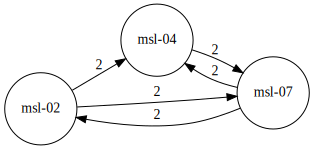

In [0]:
msl_df = retrieveData("msl*")

lagMSL = timeLag(msl_df, msl_df.columns, 3, False, None) #max lag set to 3

binData = convertToBins(lagMSL, 5) #section data into 5 bins

lagMSL = binData[0]

#initial network
edges = learnStructure_K2Modified(lagMSL)

#simplify network
sEdges = simplifyNetwork(edges[0], getCurrentNodes(lagMSL.columns))

#reduce network
rEdges = reduceNetwork(sEdges[0])

print("\n\n============================Calculating Lags============================\n")

newEdges = calculateLags(rEdges[0], rEdges[1])

dynamicEdges = dynamicNetwork(newEdges)

print("\n\n============================Calculating CPDs============================\n")

model = estimateCPDs(lagMSL, rEdges[0], "BDeu")

dynamicEdges[2] #display network

# Causality testing for SST (sea surface temperature)

In [0]:
sst_df = retrieveData("sst*")

lagSST = timeLag(sst_df, sst_df.columns, 3, False, None) #max lag set to 3

binData = convertToBins(lagSST, 5) #section data into 5 bins

lagSST = binData[0]

#initial network
edges = learnStructure_K2Modified(lagSST)

#simplify network
sEdges = simplifyNetwork(edges[0], getCurrentNodes(lagSST.columns))

#reduce network
rEdges = reduceNetwork(sEdges[0])

print("\n\n============================Calculating Lags============================\n")

newEdges = calculateLags(rEdges[0], rEdges[1])

dynamicEdges = dynamicNetwork(newEdges)

print("\n\n============================Calculating CPDs============================\n")

#model = estimateCPDs(lagSST, rEdges[0], "K2")

dynamicEdges[2] #display network

# Causality testing for Si10 (10 meter wind speed)

['eof_ts_si10-07', 'eof_ts_si10-05', 'eof_ts_si10-06', 'eof_ts_si10-04', 'eof_ts_si10-01', 'eof_ts_si10-00']


(INITIAL SCORE)
Checking: si10-07 (NO PARENTS)
Initial BIC Score: -641.6578916451374 

Improved Parent Node: si10-07_1 ----> si10-07
BIC Score: -624.0630275894315



(INITIAL SCORE)
Checking: si10-05 (NO PARENTS)
Initial BIC Score: -680.7643686010028 

Improved Parent Node: si10-05_1 ----> si10-05
BIC Score: -573.8868383000923

Improved Parent Node: si10-05_2 ----> si10-05
BIC Score: -585.9098778239834

Improved Parent Node: si10-05_3 ----> si10-05
BIC Score: -600.9807576889941

Improved Parent Node: si10-04_1 ----> si10-05
BIC Score: -674.0310146402662

Improved Parent Node: si10-01_1 ----> si10-05
BIC Score: -678.6660943545346

Improved Parent Node: si10-01_2 ----> si10-05
BIC Score: -676.0712470628201



(INITIAL SCORE)
Checking: si10-06 (NO PARENTS)
Initial BIC Score: -606.8783195280552 

Improved Parent Node: si10-06_1 ----> si10-06
BIC Score: -601.1910188067515



(INITI

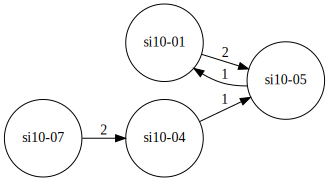

In [0]:
si10_df = retrieveData("si10*")

lagSi10 = timeLag(si10_df, si10_df.columns, 3, False, None) #max lag set to 3

binData = convertToBins(lagSi10, 5) #section data into 5 bins

lagSi10 = binData[0]


#initial network
edges = learnStructure_K2Modified(lagSi10)

#simplify network
sEdges = simplifyNetwork(edges[0], getCurrentNodes(lagSi10.columns))

#reduce network
rEdges = reduceNetwork(sEdges[0])

print("\n\n============================Calculating Lags============================\n")

newEdges = calculateLags(rEdges[0], rEdges[1])

dynamicEdges = dynamicNetwork(newEdges)

print("\n\n============================Calculating CPDs============================\n")

model = estimateCPDs(lagSi10, rEdges[0], "K2")

dynamicEdges[2] #display network

# Causality testing for T2M (temperature at 2 meters)

['eof_ts_t2m-03', 'eof_ts_t2m-06', 'eof_ts_t2m-08', 'eof_ts_t2m-07', 'eof_ts_t2m-02', 'eof_ts_t2m-04']


(INITIAL SCORE)
Checking: t2m-03 (NO PARENTS)
Initial BIC Score: -542.4251530173722 

Improved Parent Node: t2m-03_1 ----> t2m-03
BIC Score: -477.8859998006974

Improved Parent Node: t2m-03_2 ----> t2m-03
BIC Score: -523.6367645571063

Improved Parent Node: t2m-02_1 ----> t2m-03
BIC Score: -504.9016544015634

Improved Parent Node: t2m-02_2 ----> t2m-03
BIC Score: -517.8904867714779

Improved Parent Node: t2m-02_3 ----> t2m-03
BIC Score: -520.6234133863651



(INITIAL SCORE)
Checking: t2m-06 (NO PARENTS)
Initial BIC Score: -606.4647463617376 

Improved Parent Node: t2m-06_1 ----> t2m-06
BIC Score: -569.6759378381487



(INITIAL SCORE)
Checking: t2m-08 (NO PARENTS)
Initial BIC Score: -534.7637773120463 

Improved Parent Node: t2m-08_1 ----> t2m-08
BIC Score: -508.2683553948418

Improved Parent Node: t2m-02_1 ----> t2m-08
BIC Score: -527.3432883523853



(INITIAL SCORE)
Checking: t2m-0

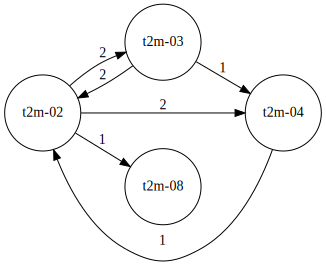

In [0]:
t2m_df = retrieveData("t2m*")

lagT2M = timeLag(t2m_df, t2m_df.columns, 3, False, None) #max lag set to 3

binData = convertToBins(lagT2M, 5) #section data into 5 bins

lagT2M = binData[0]

#initial network
edges = learnStructure_K2Modified(lagT2M)

#simplify network
sEdges = simplifyNetwork(edges[0], getCurrentNodes(lagT2M.columns))

#reduce network
rEdges = reduceNetwork(sEdges[0])

print("\n\n============================Calculating Lags============================\n")

newEdges = calculateLags(rEdges[0], rEdges[1])

dynamicEdges = dynamicNetwork(newEdges)

print("\n\n============================Calculating CPDs============================\n")

model = estimateCPDs(lagT2M, rEdges[0], "K2")

dynamicEdges[2] #display network

# Causality testing for all data

['eof_ts_msl-03', 'eof_ts_si10-07', 'eof_ts_sst-07', 'eof_ts_msl-02', 'eof_ts_t2m-03', 'eof_ts_msl-07', 'eof_ts_si10-05', 'eof_ts_msl-06', 'eof_ts_si10-06', 'eof_ts_sst-06', 'eof_ts_t2m-06', 'eof_ts_msl-01', 'eof_ts_sst-03', 'eof_ts_sst-00', 'eof_ts_sst-05', 'eof_ts_si10-04', 'eof_ts_si10-01', 'eof_ts_t2m-08', 'eof_ts_msl-04', 'eof_ts_t2m-07', 'eof_ts_t2m-02', 'eof_ts_si10-00', 'eof_ts_t2m-04', 'eof_ts_sst-04']


(INITIAL SCORE)
Checking: msl-03 (NO PARENTS)
Initial BIC Score: -631.2374327867026 



(INITIAL SCORE)
Checking: si10-07 (NO PARENTS)
Initial BIC Score: -641.6578916451374 

Improved Parent Node: si10-07_1 ----> si10-07
BIC Score: -624.0630275894315



(INITIAL SCORE)
Checking: sst-07 (NO PARENTS)
Initial BIC Score: -724.1783366078132 

Improved Parent Node: sst-07_1 ----> sst-07
BIC Score: -417.0628165749297

Improved Parent Node: sst-07_2 ----> sst-07
BIC Score: -519.9798312817722

Improved Parent Node: sst-07_3 ----> sst-07
BIC Score: -574.1376172517548

Improved Parent No

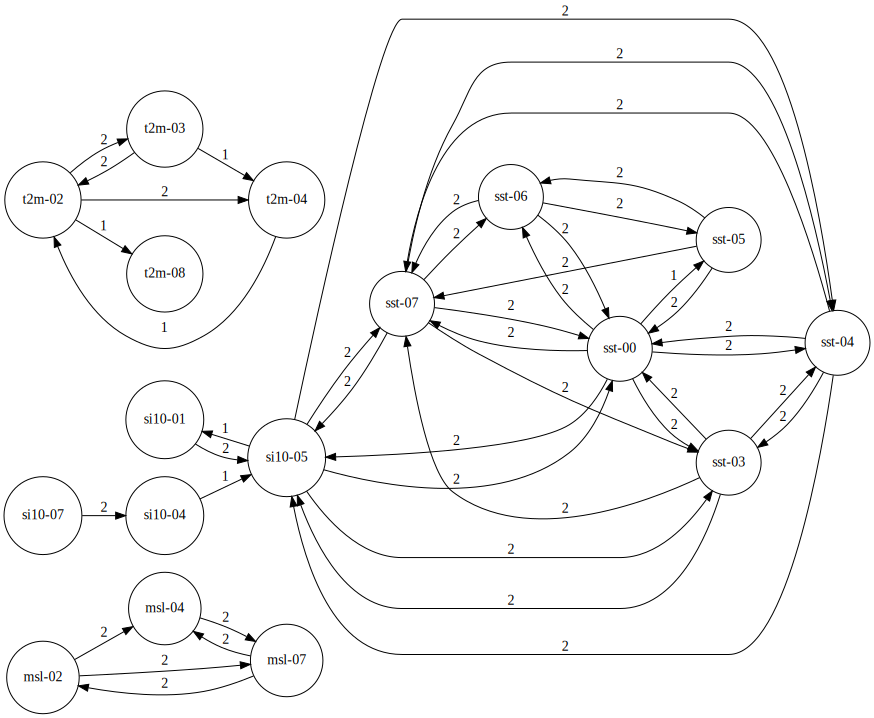

In [0]:
df = retrieveData("*")

lagAll = timeLag(df, df.columns, 3, False, None) #max lag set to 3

binData = convertToBins(lagAll, 5) #section data into 5 bins

lagAll = binData[0]

#initial network
edges = learnStructure_K2Modified(lagAll)

#simplify network
sEdges = simplifyNetwork(edges[0], getCurrentNodes(lagAll.columns))

#reduce network
rEdges = reduceNetwork(sEdges[0])

print("\n\n============================Calculating Lags============================\n")

newEdges = calculateLags(rEdges[0], rEdges[1])

dynamicEdges = dynamicNetwork(newEdges)

print("\n\n============================Calculating CPDs============================\n")

#model = estimateCPDs(lagAll, rEdges[0], "K2")

dynamicEdges[2] #display network

# Scientific Question

Does causality graph/network change over time? We have 40 years data. If we create causality graph/network for each 10 years. Are the causality graph/networks the same?

['eof_ts_msl-03', 'eof_ts_si10-07', 'eof_ts_sst-07', 'eof_ts_msl-02', 'eof_ts_t2m-03', 'eof_ts_msl-07', 'eof_ts_si10-05', 'eof_ts_msl-06', 'eof_ts_si10-06', 'eof_ts_sst-06', 'eof_ts_t2m-06', 'eof_ts_msl-01', 'eof_ts_sst-03', 'eof_ts_sst-00', 'eof_ts_sst-05', 'eof_ts_si10-04', 'eof_ts_si10-01', 'eof_ts_t2m-08', 'eof_ts_msl-04', 'eof_ts_t2m-07', 'eof_ts_t2m-02', 'eof_ts_si10-00', 'eof_ts_t2m-04', 'eof_ts_sst-04']


(INITIAL SCORE)
Checking: msl-03 (0) (NO PARENTS)
Initial BIC Score: -178.56001391975892 



(INITIAL SCORE)
Checking: si10-07 (0) (NO PARENTS)
Initial BIC Score: -165.2175125245337 



(INITIAL SCORE)
Checking: sst-07 (0) (NO PARENTS)
Initial BIC Score: -187.98374266180517 

Improved Parent Node: sst-07 (0)_1 ----> sst-07 (0)
BIC Score: -140.49780809636377

Improved Parent Node: sst-07 (0)_2 ----> sst-07 (0)
BIC Score: -167.53578384249496

Improved Parent Node: sst-07 (0)_3 ----> sst-07 (0)
BIC Score: -172.62176081066576

Improved Parent Node: sst-07 (0)_4 ----> sst-07 (0)
BI

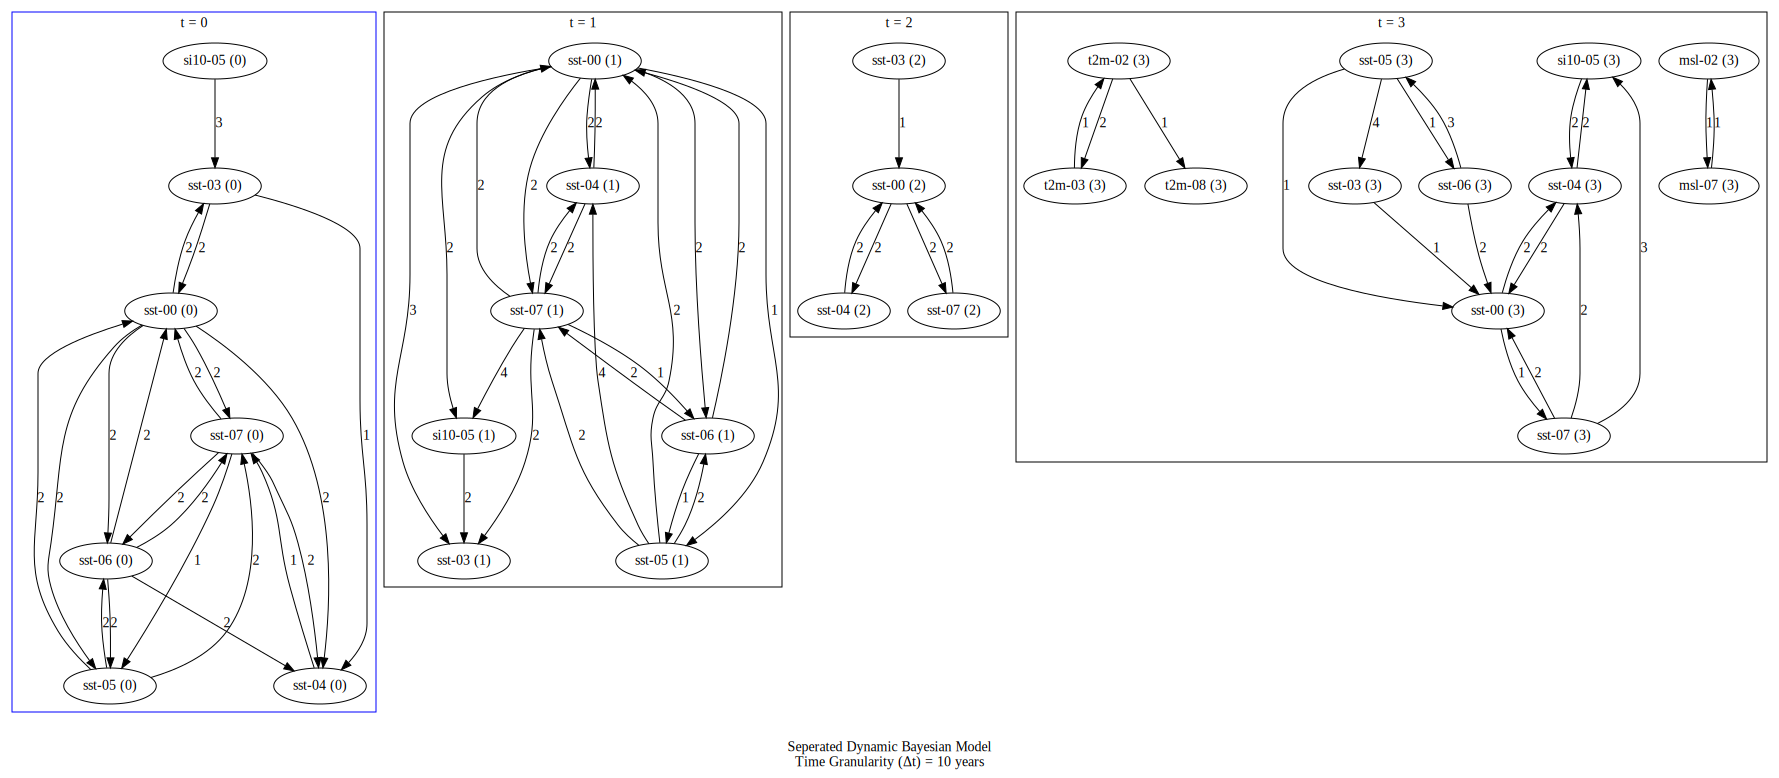

In [0]:
def renameColumns(columns, appendString):
  newNames = []
  for i in range(0, len(columns)):
    newNames.append(columns[i] +" ("+ appendString+")")
  return newNames
    
def sliceDf(dataframe, timeslices = 4):
  low = 0
  step = int(len(dataframe) / timeslices)
  datasets = [] #array of dataframes
  for i in range(0, timeslices):
    subframe = dataframe[low : low+step]
    datasets.append(pd.DataFrame(subframe.values, columns=renameColumns(df.columns, str(i) )))
    low += step
  return datasets


df = retrieveData("*")

dataFrames = sliceDf(df, 4) #creating 4 dataframes of 10 years

g = Digraph('Network', filename='Sliced_Model') #name, filename
g.attr(label='\nSeperated Dynamic Bayesian Model\nTime Granularity (Δt) = 10 years')

i=0
for df in dataFrames:
  
  lagAll = timeLag(df, df.columns, 4, False, None) #max lag set to 4
  binData = convertToBins(lagAll, 5) #section data into 5 bins
  lagAll = binData[0]

  #initial network
  edges = learnStructure_K2Modified(lagAll)
  
  #simplify network
  sEdges = simplifyNetwork(edges[0], getCurrentNodes(lagAll.columns))

  #reduce network
  rEdges = reduceNetwork(sEdges[0])

  print("\n\n============================Calculating Lags============================\n")
  newEdges = calculateLags(rEdges[0], rEdges[1])

  dynamicEdges = dynamicNetwork(newEdges)

  print("\n\n============================Calculating CPDs============================\n")
  #model = estimateCPDs(lagAll, dynamicEdges[0], "K2")
  
  name1 = "cluster: " + str(i)
  with g.subgraph(name=name1) as c:
    label = "t = " + str(i)
    if i == 0:
      c.attr(label=label, color='Blue')
    else:
      c.attr(label=label)
    for j in range(0, len(newEdges)):
      parent = newEdges[j][0]
      child = newEdges[j][1]
      label = str(newEdges[j][2])

      c.edge(parent, child, label=label)  
    
  i+=1
  
g.view()  
g #print network


# Conclusions

After running the causality tests we can see that ther exists causal connections between different atmospheric variables at different locations. 


---



Implementing the modified K2 algorithm compared to the actually K2 algorithm produced results much faster because it did not need to loop back between all the nodes multiple times to increment the set of best parents. The modified approach only accounts for potential parent nodes that managed to imporve the score independently.


---



There still exists a few caveats to using the modified approach. It does not rank wheter or not all improved parents put together improve the score. it only does so individually. We use the modified approach to produce more general results faster.



---

Up until now we have been putting our data into bins to reduce the complexity of the computations. Although it has its pros, it also comes with its cons. Using bins reduces the accuracy and fit to the acutally datasets but is ultimately used to capture ranges of behavior of the original dataset.



---

One challege that I face is estimating the parameters of the dynamic bayesian network. As for now, I managed to reduce the network into a simple directed acyclic graph where I can use a bayesian estimating function to find the conditional probability distributions. The problem with this is that this does not capture all the conditional dependencies and also ignores time lagged variables. From these parameters we can only make very general predictions on possible outcomes.



---

The K2 algorithm for score-based structure learning is one of many structure learning approach out there. There also exists, constraint-based structure learning that consists of a fully directed graph and removed independencies, the HillCimb search, which uses a heuristic approach to single edge manipulations to maximize the structure's score, etc. 
